In [42]:
# importing libraries needed
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pickle

In [2]:
df=pd.read_csv('Clean_data.csv')

In [3]:
df.isna().sum()

Unnamed: 0                                                    0
status                                                        0
duration                                                      0
amount                                                        0
savings                                                       0
employment_duration                                           0
installment_rate                                              0
present_residence                                             0
age                                                           0
number_credits                                                0
credit_risk                                                   0
credit_history_critical account/other credits elsewhere       0
credit_history_delay in paying off in the past                0
credit_history_existing credits paid back duly till now       0
credit_history_no credits taken/all credits paid back duly    0
purpose_car (new)                       

In [4]:
X=df.drop(columns='credit_risk')
Y=df['credit_risk']

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

# KNN

In [7]:
knn=KNeighborsClassifier ()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [8]:
knn.score(X_test,Y_test)

0.9066666666666666

In [34]:
Y_pred_knn = knn.predict(X_test)

In [35]:
print(accuracy_score(Y_test,Y_pred_knn))

0.9066666666666666


In [36]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_test,Y_pred_knn)
conf_mat

array([[ 72,  20],
       [  8, 200]])

In [37]:
#Printing classification report for KNN claassifier
from sklearn import metrics
print('Classification Report_KNN','\n',metrics.classification_report(Y_test, Y_pred_knn))

Classification Report_KNN 
               precision    recall  f1-score   support

           0       0.90      0.78      0.84        92
           1       0.91      0.96      0.93       208

    accuracy                           0.91       300
   macro avg       0.90      0.87      0.89       300
weighted avg       0.91      0.91      0.90       300



In [38]:
# Area Under Curve
auc = roc_auc_score(Y_test, Y_pred_knn)
auc

0.8720735785953178

In [40]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_knn)

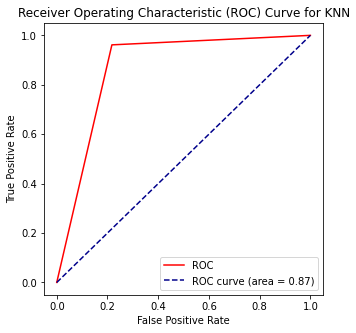

In [43]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend()
plt.show()

# SVM

In [9]:
svm=SVC()
svm.fit(X_train,Y_train)

SVC()

In [10]:
svm.score(X_test,Y_test)

0.9133333333333333

In [44]:
Y_pred_svm = svm.predict(X_test)

In [46]:
print(accuracy_score(Y_test,Y_pred_svm))

0.9133333333333333


In [47]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_test,Y_pred_svm)
conf_mat

array([[ 70,  22],
       [  4, 204]])

In [48]:
#Printing classification report for KNN claassifier
from sklearn import metrics
print('Classification Report_SVM','\n',metrics.classification_report(Y_test, Y_pred_svm))

Classification Report_SVM 
               precision    recall  f1-score   support

           0       0.95      0.76      0.84        92
           1       0.90      0.98      0.94       208

    accuracy                           0.91       300
   macro avg       0.92      0.87      0.89       300
weighted avg       0.92      0.91      0.91       300



In [49]:
# Area Under Curve
auc = roc_auc_score(Y_test, Y_pred_svm)
auc

0.8708193979933112

In [51]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_svm)

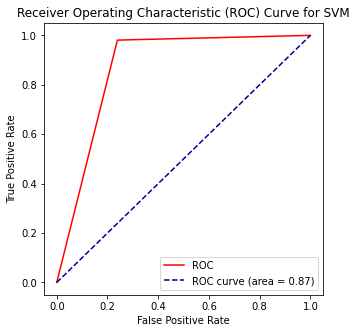

In [52]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend()
plt.show()

#Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [61]:
Y_pred_logistic = log_reg.predict(X_test)

In [63]:
accuracy_logistic = accuracy_score(Y_test,Y_pred_logistic)
accuracy_logistic

0.88

In [65]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_test,Y_pred_logistic)
conf_mat

array([[ 75,  17],
       [ 19, 189]])

In [68]:
# Area Under Curve
auc_logistic = roc_auc_score(Y_test, Y_pred_logistic)
auc_logistic

0.8619356187290972

In [66]:
# ROC
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(Y_test, Y_pred_logistic)

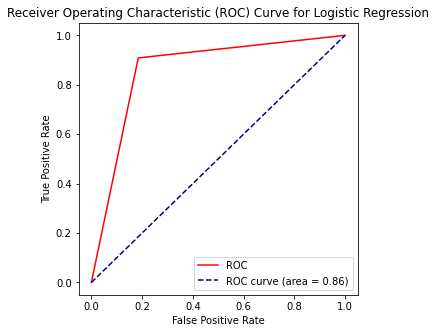

In [69]:
plt.figure(figsize=(5,5))
plt.plot(fpr_logistic, tpr_logistic, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc_logistic)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend()
plt.show()

# Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

In [71]:
GNB.fit(X_train,Y_train)

GaussianNB()

In [75]:
Y_pred_gnb = GNB.predict(X_test)

In [76]:
print(accuracy_score(Y_test, Y_pred_gnb))

0.8333333333333334


In [79]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_test,Y_pred_gnb)
conf_mat

array([[ 66,  26],
       [ 24, 184]])

In [80]:
#Printing classification report for Naive Bayes claassifier
from sklearn import metrics
print('Classification Report_test','\n',metrics.classification_report(Y_test, Y_pred_gnb))

Classification Report_test 
               precision    recall  f1-score   support

           0       0.73      0.72      0.73        92
           1       0.88      0.88      0.88       208

    accuracy                           0.83       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.83      0.83      0.83       300



In [81]:
# Area Under Curve
auc = roc_auc_score(Y_test, Y_pred_gnb)
auc

0.8010033444816054

In [82]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_gnb)

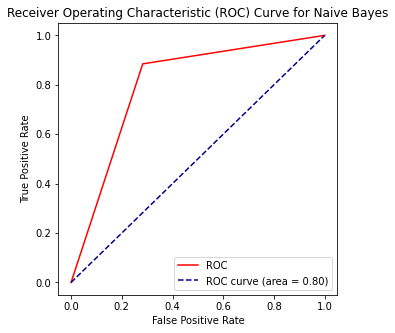

In [83]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend()
plt.show()

# Randomforest

In [12]:
random= RandomForestClassifier ()
random.fit(X_train,Y_train)

RandomForestClassifier()

In [13]:
random.score(X_test,Y_test)

0.9433333333333334

In [53]:
Y_pred_random = random.predict(X_test)

In [54]:
print(accuracy_score(Y_test,Y_pred_random))

0.9433333333333334


In [55]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_test,Y_pred_random)
conf_mat

array([[ 76,  16],
       [  1, 207]])

In [56]:
#Printing classification report for KNN claassifier
from sklearn import metrics
print('Classification Report_Random Forest','\n',metrics.classification_report(Y_test, Y_pred_random))

Classification Report_Random Forest 
               precision    recall  f1-score   support

           0       0.99      0.83      0.90        92
           1       0.93      1.00      0.96       208

    accuracy                           0.94       300
   macro avg       0.96      0.91      0.93       300
weighted avg       0.95      0.94      0.94       300



In [57]:
# Area Under Curve
auc = roc_auc_score(Y_test, Y_pred_random)
auc

0.9106396321070235

In [58]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_random)

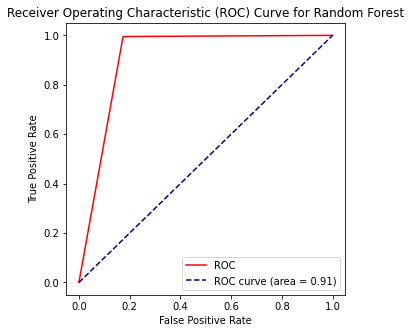

In [59]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend()
plt.show()

# Look at parameters used by Random forest

In [84]:
print('Parameters used in Random forest:\n')
print(random.get_params())

Parameters used in Random forest:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


# Using Random Hyperparameter Grid

In [15]:
from sklearn.model_selection import RandomizedSearchCV

In [16]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 25)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [17]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [87]:
print(random_grid)

{'n_estimators': [200, 208, 216, 225, 233, 241, 250, 258, 266, 275, 283, 291, 300, 308, 316, 325, 333, 341, 350, 358, 366, 375, 383, 391, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 14, 18, 23, 27, 32, 36, 41, 45, 50, None], 'min_samples_split': [2, 5, 10]}


In [19]:
rf_random = RandomizedSearchCV(estimator = random, 
                               param_distributions = random_grid,
                               n_iter = 100, cv = 3,
                               verbose=2, random_state=42,
                               n_jobs = -1)

In [21]:
rf_random.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 14, 18, 23, 27, 32,
                                                      36, 41, 45, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 208, 216, 225,
                                                         233, 241, 250, 258,
                                                         266, 275, 283, 291,
                                                         300, 308, 316, 325,
                                                         333, 341, 350, 358,
                                                         366, 375, 383,

In [91]:
rf_random.best_params_

{'n_estimators': 283, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 18, 'bootstrap': False}

In [99]:
RFtuned = RandomForestClassifier(n_estimators = 283,
                                min_samples_split = 5,
                                min_samples_leaf= 2, 
                                max_features = 'auto',
                                max_depth= 18, 
                                bootstrap=False) 
RFtuned.fit( X_train, Y_train) 

RandomForestClassifier(bootstrap=False, max_depth=18, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=283)

In [100]:
RFtuned.score(X_test,Y_test)

0.9433333333333334

In [101]:
Y_pred_RFtuned = RFtuned.predict(X_test)

In [102]:
print(accuracy_score(Y_test,Y_pred_RFtuned))

0.9433333333333334


In [103]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_test,Y_pred_RFtuned)
conf_mat

array([[ 76,  16],
       [  1, 207]])

In [104]:
#Printing classification report for KNN claassifier
from sklearn import metrics
print('Classification Report_Random Forest_Hyper_parameter_tuned','\n',metrics.classification_report(Y_test, Y_pred_RFtuned))

Classification Report_Random Forest_Hyper_parameter_tuned 
               precision    recall  f1-score   support

           0       0.99      0.83      0.90        92
           1       0.93      1.00      0.96       208

    accuracy                           0.94       300
   macro avg       0.96      0.91      0.93       300
weighted avg       0.95      0.94      0.94       300



In [109]:
# Area Under Curve
auc = roc_auc_score(Y_test, Y_pred_RFtuned)
auc

0.9106396321070235

In [110]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_RFtuned)

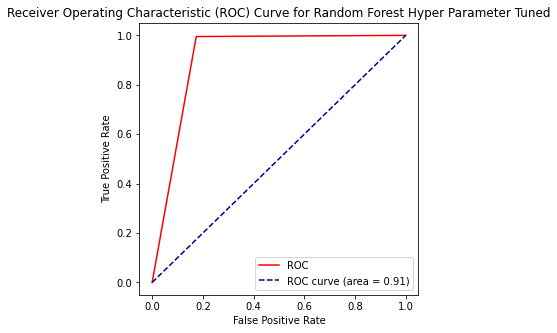

In [111]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Hyper Parameter Tuned')
plt.legend()
plt.show()

# Conclusion about Model Selection

Here, created Five models, they are Logistic regression, Naïve Bayes, SVM, KNN and Random Forest.

Compare the Accuracy, F1-Score and AUC of all models. 
The algorithm having a better Accuracy, F1-Score and AUC shall be considered for create model.


Here we find the best model as **Random Forest** model with 

# Accuracy=**94.3%**

# F1-Score=**0.90** for 0 and **0.96** for  1

# AUC=**0.91**

# save the model to disk


In [112]:
filename = 'finalized_model.sav'
pickle.dump(rf_random, open(filename, 'wb'))